In [128]:
import numpy as np
from matplotlib import pyplot as plt
import math

In [129]:
N = 50
x_start, x_end = -8.0, 8.0
y_start, y_end = -4.0, 4.0
x = np.linspace(x_start, x_end)
y = np.linspace(y_start, y_end)

print('x = ', x)
print('y = ', y)
X, Y = np.meshgrid(x, y)

x =  [-8.         -7.67346939 -7.34693878 -7.02040816 -6.69387755 -6.36734694
 -6.04081633 -5.71428571 -5.3877551  -5.06122449 -4.73469388 -4.40816327
 -4.08163265 -3.75510204 -3.42857143 -3.10204082 -2.7755102  -2.44897959
 -2.12244898 -1.79591837 -1.46938776 -1.14285714 -0.81632653 -0.48979592
 -0.16326531  0.16326531  0.48979592  0.81632653  1.14285714  1.46938776
  1.79591837  2.12244898  2.44897959  2.7755102   3.10204082  3.42857143
  3.75510204  4.08163265  4.40816327  4.73469388  5.06122449  5.3877551
  5.71428571  6.04081633  6.36734694  6.69387755  7.02040816  7.34693878
  7.67346939  8.        ]
y =  [-4.         -3.83673469 -3.67346939 -3.51020408 -3.34693878 -3.18367347
 -3.02040816 -2.85714286 -2.69387755 -2.53061224 -2.36734694 -2.20408163
 -2.04081633 -1.87755102 -1.71428571 -1.55102041 -1.3877551  -1.2244898
 -1.06122449 -0.89795918 -0.73469388 -0.57142857 -0.40816327 -0.24489796
 -0.08163265  0.08163265  0.24489796  0.40816327  0.57142857  0.73469388
  0.89795918  1.0

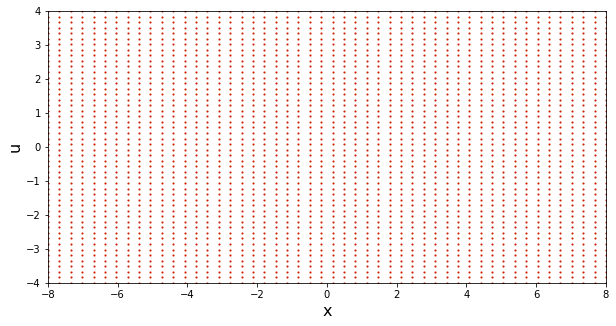

In [130]:
% matplotlib inline

width = 10.0
height = (y_end - y_start) / (x_end - x_start) * width
plt.figure(figsize=(width, height))
plt.xlabel('x' , fontsize=16)
plt.ylabel('u' , fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.scatter(X, Y, s=5, color='#CD2305', marker = '.')

In [131]:
strength_source = 5.0
x_source, y_source = -1.0, 0.0

u_source = (strength_source / (2 * math.pi) *
            (X - x_source) / ((X - x_source)**2 + (Y - y_source)**2))
v_source = (strength_source / (2 * math.pi) *
            (Y - y_source) / ((X - x_source)**2 + (Y - y_source)**2))

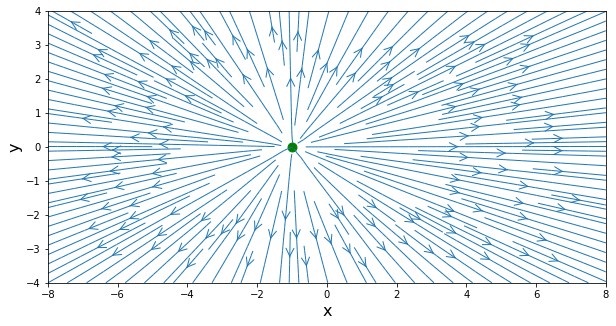

In [132]:
width = 10.0
height = (y_end - y_start) / (x_end - x_start) * width
plt.figure(figsize=(width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u_source, v_source,
                  density=2, linewidth=1, arrowsize=2, arrowstyle='->')
plt.scatter(x_source, y_source,
               color='g', s=80, marker='o');

In [133]:
strength_sink = -5.0    
x_sink, y_sink = 1.0, 0.0                

u_sink = (strength_sink / (2 * math.pi) *
          (X - x_sink) / ((X - x_sink)**2 + (Y - y_sink)**2))
v_sink = (strength_sink / (2 * math.pi) *
          (Y - y_sink) / ((X - x_sink)**2 + (Y - y_sink)**2))

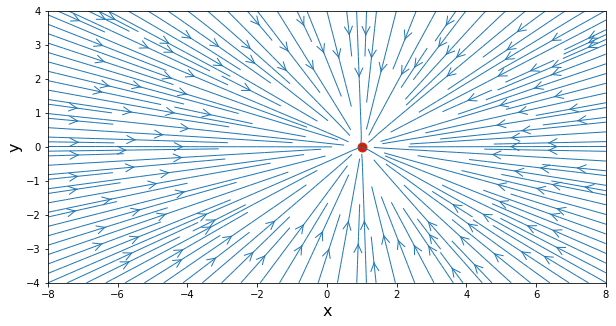

In [134]:
width = 10.0
height = (y_end - y_start) / (x_end - x_start) * width
plt.figure(figsize=(width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u_sink, v_sink,
                  density=2, linewidth=1, arrowsize=2, arrowstyle='->')
plt.scatter(x_sink, y_sink,
               color='#CD2305', s=80, marker='o');

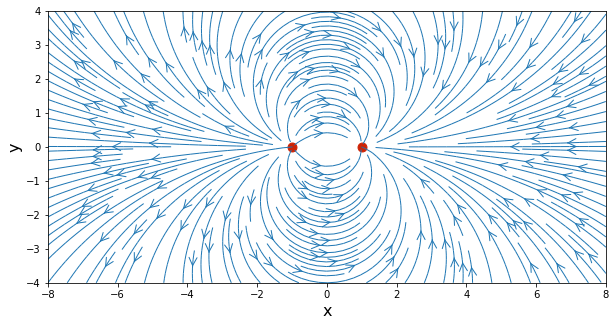

In [135]:

u_pair = u_source + u_sink
v_pair = v_source + v_sink

width = 10.0
height = (y_end - y_start) / (x_end - x_start) * width
plt.figure(figsize=(width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u_pair, v_pair,
                  density=2.0, linewidth=1, arrowsize=2, arrowstyle='->')
plt.scatter([x_source, x_sink], [y_source, y_sink], 
               color='#CD2305', s=80, marker='o');

## Closed Streamlines
Closed streamlines essentially act as a solid body in the flow, 

In [136]:
def source(strength, x_source, y_source, X, Y):
    
    u_source = (strength / (2 * math.pi) * (X - x_source) / ((X - x_source)**2 + (Y - y_source)**2))
    v_source = (strength / (2 * math.pi) * (Y - y_source) / ((X - x_source)**2 + (Y - y_source)**2))
    psi_source = strength / (2 * np.pi) * np.arctan2((Y - y_source), (X - x_source))
    return u_source, v_source, psi_source


In [137]:
def sink(strength, x_sink, y_sink, X, Y):
    
    u_sink = (strength / (2 * math.pi) * (X - x_sink) / ((X - x_sink)**2 + (Y - y_sink)**2))
    v_sink = (strength / (2 * math.pi) * (Y - y_sink) / ((X - x_sink)**2 + (Y - y_sink)**2))
    psi_sink = strength / (2 * np.pi) * np.arctan2((Y - y_sink), (X - x_sink))
    return u_sink, v_sink, psi_sink

In [138]:
u_inf = 1.0      
def hor_freestream(u_inf, N, Y):
    u_freestream = u_inf * np.ones((N, N), dtype=float)
    v_freestream = np.zeros((N, N), dtype=float)
    psi_freestream = u_inf * Y
    return u_freestream, v_freestream,  psi_freestream

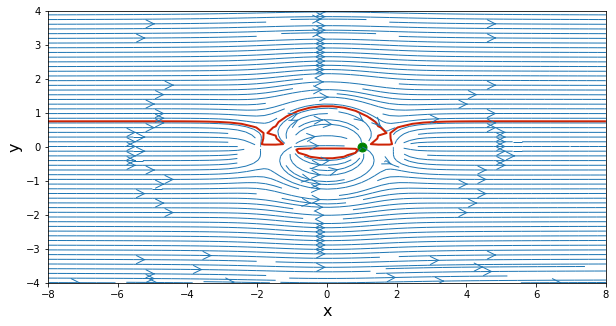

In [152]:
width = 10.0
strength = 5.0
height = (y_end - y_start) / (x_end - x_start) * width
u_source, v_source, psi_source = source(5.0 , -1.0, 0.0, X, Y)
u_sink, v_sink, psi_sink = sink(-5.0, 1.0, 0.0, X, Y)
u_source1, v_source1, psi_source1 = source(2.0 , 2.0, 0.0, X, Y)
u_sink1, v_sink1, psi_sink1 = sink(-2.0, -2.0, 0.0, X, Y)
u_freestream, v_freestream, psi_freestream = hor_freestream(u_inf, N, Y)

    u_total = u_freestream + u_source + u_sink + u_sink1 + u_source1
v_total = v_freestream + v_source + v_sink + v_sink1 + v_source1
psi_total = psi_freestream + psi_source + psi_sink + psi_source1 + psi_sink1

plt.figure(figsize=(width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u_total, v_total , density=2, linewidth=1, arrowsize=2, arrowstyle='->')
plt.scatter(1.0, 0,
               color='g', s=80, marker='o');
plt.contour(X, Y, psi_total, 
               levels=[0.75], 
               colors='#CD2305', linewidths=2, linestyles='solid');